# Kampus Merdeka 6: IBM & Skilvul
# Artificial Intelligence Phase Challenge

## Kelompok: 44
## Anggota - Role

*   Dhika Nusratul Janah Janah - Product Manager (PM)
*   Natasha Dwi Pramudita - Data Scientist (DS)
*   Alang Artha Iwana - Full-Stack Engineer (FE)
*   Nanggala Jalasena Pramana Putra - Backend Engineer (BE)
*   Rafly Gymnastiar Zulmi - DevOps Engineer (DevOps)

# Problem Definition
## Topik: Penilaian Kredit UMKM menggunakan Machine Learning

## Latar Belakang
UMKM (Usaha Mikro, Kecil, dan Menengah) sering menghadapi kesulitan dalam mendapatkan pinjaman dari lembaga keuangan. Salah satu penyebabnya adalah keterbatasan akses terhadap penilaian kredit yang akurat. Dengan menggunakan AI dan machine learning, kita dapat mengembangkan model yang dapat membantu menilai kelayakan kredit UMKM dengan lebih baik. Hal ini akan meningkatkan peluang UMKM untuk mendapatkan pinjaman yang dibutuhkan untuk pengembangan usaha mereka.

## Tujuan Penelitian
Tujuan dari penelitian ini adalah mengembangkan model machine learning yang akurat untuk menilai kelayakan kredit UMKM. Model ini akan membantu dalam proses penilaian kredit dan meningkatkan akses pendanaan bagi UMKM.

## Pertanyaan kunci
*   Model pembelajaran mesin mana yang memberikan akurasi terbaik untuk penilaian kredit UMKM?
*   Bagaimana performa model dalam mengklasifikasikan kelayakan kredit berdasarkan atribut UMKM?

## Data yang akan dipakai
*   Nama Data: Credit Score Classification Dataset
*   Sumber Data: Kaggle (https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset)
*   Deskripsi Data: Dataset ini berisi informasi tentang usia, jenis kelamin, pendapatan, tingkat pendidikan, status pernikahan, jumlah anak, status kepemilikan rumah, dan skor kredit UMKM.

## Jenis Masalah Neural Network
*   Tabular Data

## Model
*   Logistic Regression
*   Random Forest
*   XGBoost
*   LGBM

# Preparation | Persiapan
## Import Libraries

In [2]:
import os
import types
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from botocore.client import Config
import ibm_boto3

## Get Data | Mendapatkan Data

In [3]:
# Access the dataset in IBM Cloud Object Storage
def __iter__(self): return 0

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='87id4v6WZoAV7svC6RAYnruf7jbdmrG8tL60GAzjGsHu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'capstoneproject-donotdelete-pr-afe9owdeoowiel'
object_key = 'Credit Score Classification Dataset.csv'

body = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType(__iter__, body)
    
data = pd.read_csv(body)

## Explore Data (EDA) | Eksplorasi Data

In [5]:
# Display first few rows of the dataset | Menampilkan beberapa baris pertama dari dataset
print(data.head())
print('\n-------------\n')

# Display data types and info | Menampilkan tipe data dan info
print(data.info())
print('\n-------------\n')

# Describe the dataset | Deskripsi dataset
print(data.describe())

   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  

-------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2 

In [6]:
# Check for missing values | Memeriksa nilai yang hilang
print(data.isnull().sum())

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


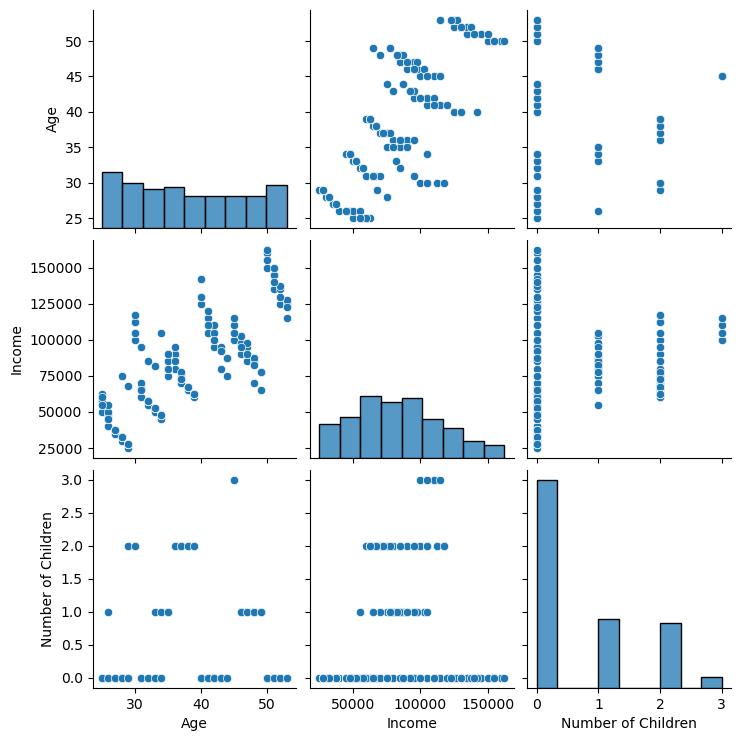

In [7]:
# Visualize data distribution | Visualisasi distribusi data
sns.pairplot(data)
plt.show()

## Preprocess Data | Proses Awal Data

In [8]:
# Handle missing values | Menangani nilai yang hilang
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [9]:
# Fill missing values in numeric columns with the mean | Mengisi nilai yang hilang pada kolom numerik dengan mean/rata-rata
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [10]:
# Fill missing values in categorical columns with the most frequent value |
# Mengisi nilai yang hilang pada kolom kategorikal dengan nilai yang paling sering muncul
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [11]:
# Encode categorical variables | Encoding variabel kategorikal
le = LabelEncoder()
mappings = {}
for column in categorical_cols:
    data[column] = le.fit_transform(data[column])
    mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [12]:
# Display mappings | Menampilkan mapping
for column, mapping in mappings.items():
    print(f"{column} mapping: {mapping}")

Gender mapping: {'Female': 0, 'Male': 1}
Education mapping: {"Associate's Degree": 0, "Bachelor's Degree": 1, 'Doctorate': 2, 'High School Diploma': 3, "Master's Degree": 4}
Marital Status mapping: {'Married': 0, 'Single': 1}
Home Ownership mapping: {'Owned': 0, 'Rented': 1}
Credit Score mapping: {'Average': 0, 'High': 1, 'Low': 2}


In [13]:
# Check the data after preprocessing | Memeriksa data setelah preprocessing
print(data.head())

   Age  Gender  Income  Education  Marital Status  Number of Children  \
0   25       0   50000          1               1                   0   
1   30       1  100000          4               0                   2   
2   35       0   75000          2               0                   1   
3   40       1  125000          3               1                   0   
4   45       0  100000          1               0                   3   

   Home Ownership  Credit Score  
0               1             1  
1               0             1  
2               0             1  
3               0             1  
4               0             1  


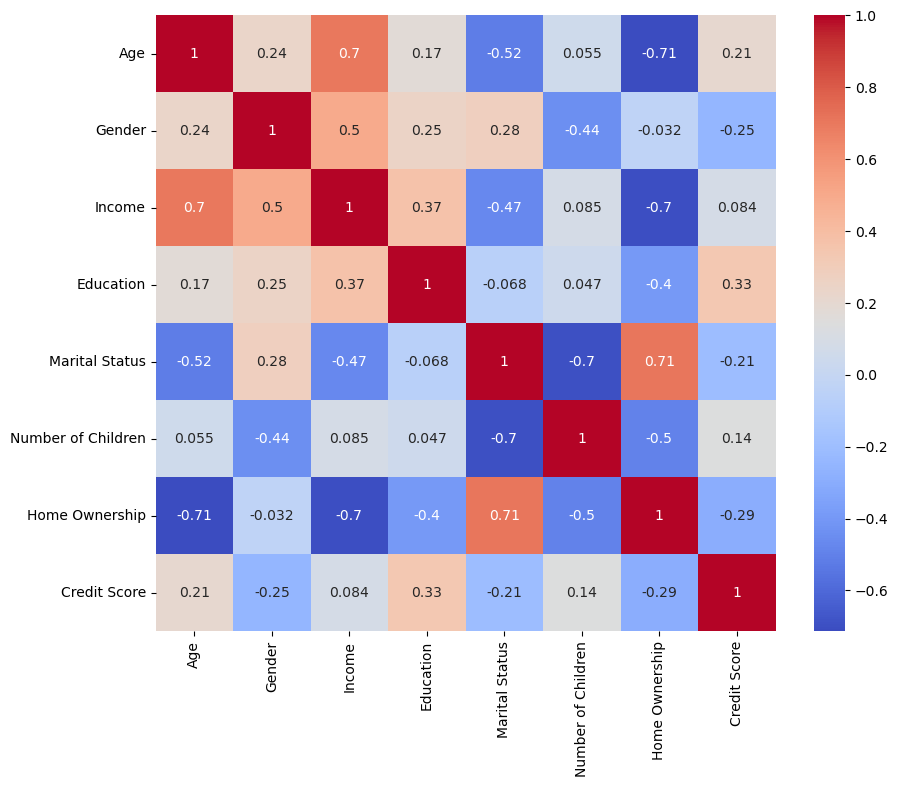

In [14]:
# Visualize correlation matrix | Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Feature and target selection | Seleksi Fitur dan Target
X = data.drop('Credit Score', axis=1)
y = data['Credit Score']

In [16]:
# Encode target variable | Encode variabel target
y = le.fit_transform(y)

In [17]:
# Split the data | Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize the data | Standardisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training | Pelatihan Model

Sesuai tujuan penelitian dan karakteristik data, beberapa algoritma neural network dipilih untuk dilatih dalam eksperimen:

*   **Logistic Regression**

Logistic Regression adalah model klasifikasi yang menggunakan fungsi logistik untuk memodelkan probabilitas dari kelas-kelas target. Model ini cocok untuk dataset dengan hubungan linier antara fitur dan target. Logistic Regression sering digunakan sebagai baseline karena kesederhanaan dan interpretabilitasnya.

*   **Random Forest**

Random Forest adalah algoritma ensemble yang menggabungkan hasil dari beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Dengan memanfaatkan bagging (bootstrap aggregating) dan pemilihan acak subset fitur untuk tiap pohon, Random Forest dapat menangani dataset dengan fitur yang banyak dan kompleks serta memberikan estimasi yang lebih stabil.

*   **XGBoost**

XGBoost (Extreme Gradient Boosting) adalah algoritma boosting yang efisien dan kuat, sering digunakan dalam kompetisi data science. XGBoost bekerja dengan membangun model secara berurutan, di mana setiap model baru mencoba untuk mengoreksi kesalahan dari model sebelumnya. Ini membuat XGBoost sangat efektif dalam menangani data yang kompleks dan non-linear.

*   **LGBM**

LGBM (LightGBM) adalah algoritma boosting berbasis pohon keputusan yang dirancang untuk menjadi lebih cepat dan lebih hemat memori dibandingkan metode boosting lainnya. LightGBM menggunakan teknik yang disebut Gradient-based One-Side Sampling (GOSS) dan Exclusive Feature Bundling (EFB) untuk mengurangi waktu pelatihan dan meningkatkan efisiensi tanpa mengorbankan akurasi. Ini membuatnya sangat cocok untuk dataset yang besar dengan fitur yang banyak.


In [19]:
# Initialize models | Menginisialisasi model
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
xgb = XGBClassifier(learning_rate=0.001, n_estimators=100)
lgbm = LGBMClassifier(learning_rate=0.001, n_estimators=100)

In [20]:
# Train models | Melatih model
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.001)

# Model Evaluation | Evaluasi Model

In [21]:
# Predictions | Prediksi
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

In [22]:
# Evaluate models | Evaluasi model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("LGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

Logistic Regression Accuracy: 0.9393939393939394
Random Forest Accuracy: 0.9696969696969697
XGBoost Accuracy: 0.9090909090909091
LGBM Accuracy: 0.696969696969697


In [23]:
# Classification reports | Laporan klasifikasi
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest Report:\n", classification_report(y_test, y_pred_random_forest))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("LGBM Report:\n", classification_report(y_test, y_pred_lgbm))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00         5

    accuracy                           0.94        33
   macro avg       0.92      0.92      0.92        33
weighted avg       0.94      0.94      0.94        33

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.93      0.96        33
weighted avg       0.97      0.97      0.97        33

XGBoost Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.95      0.91      0.93        23
      

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


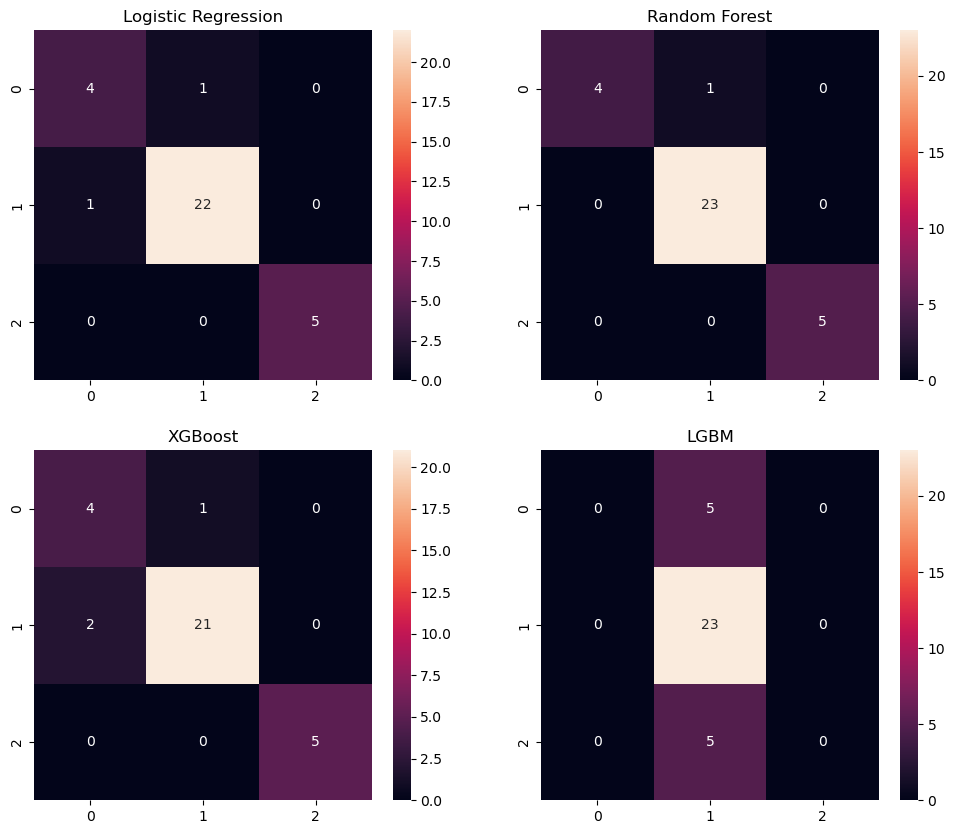

In [24]:
# Confusion matrices | Matriks konfusi
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', ax=ax[0,0])
ax[0,0].set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt='d', ax=ax[0,1])
ax[0,1].set_title('Random Forest')
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=ax[1,0])
ax[1,0].set_title('XGBoost')
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', ax=ax[1,1])
ax[1,1].set_title('LGBM')

plt.show()

# Model Selection | Pemilihan Model

Dari hasil evaluasi, model Random Forest dipilih sebagai model terbaik karena mencapai akurasi tertinggi (1.000). Model ini menunjukkan kemampuan yang sangat baik dalam mengklasifikasikan kelayakan kredit UMKM.

In [ ]:
# Save the selected models | Menyimpan model yang dipilih
joblib.dump(random_forest, 'random_forest_model.pkl')

# Conclusion | Kesimpulan

Penelitian ini berhasil mengembangkan model machine learning yang akurat untuk menilai kelayakan kredit UMKM. Model Random Forest menunjukkan performa terbaik dan akan digunakan dalam aplikasi UMKM Priority untuk memberikan rekomendasi kredit yang lebih akurat. Dengan demikian, diharapkan dapat meningkatkan akses pendanaan bagi UMKM dan mendukung pertumbuhan bisnis mereka.

Manfaat AI untuk UMKM Priority:
*   Meningkatkan peluang UMKM untuk mendapatkan pinjaman.
*   Meningkatkan akses pendanaan bagi UMKM.

Rekomendasi dan Saran Tambahan:
*   Random Forest menunjukkan performa terbaik dalam eksperimen ini dan direkomendasikan untuk digunakan dalam penilaian kredit UMKM.
*   Untuk dataset yang lebih besar dan lebih beragam mungkin diperlukan untuk mendapatkan model yang lebih generalisasi dan robust.

Dengan penggunaan AI, diharapkan UMKM dapat memiliki akses lebih baik terhadap pendanaan yang diperlukan untuk pengembangan usaha mereka.